**Import libraries**

In [416]:
import pandas as pd

In [417]:
import numpy as np

**Read the dataset**

In [418]:
data = pd.read_csv("/content/sample_data/spam.csv",encoding='latin-1')

In [419]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [420]:
data.shape

(5572, 5)

In [421]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [422]:
data.drop(labels=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [423]:
data.rename(columns={'v1':'Class','v2':'Text'},inplace=True)

In [424]:
data['numClass'] = data['Class'].map({'ham':0, 'spam':1})

In [425]:
data['Count']=0

In [426]:
for i in np.arange(0,len(data.Text)):
    data.loc[i,'Count'] = len(data.loc[i,'Text'])

In [427]:
print("Unique values in Class: ", data.Class.unique())

Unique values in Class:  ['ham' 'spam']


In [428]:
data.head()

,Class,Text,numClass,Count
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


In [429]:
ham  = data[data.numClass == 0]

In [430]:
ham_count  = pd.DataFrame(pd.value_counts(ham['Count'],sort=True).sort_index())

In [431]:
print("No of ham msg = ", ham['Class'].count())

No of ham msg =  4825


In [432]:
print("Ham Count = ", ham_count['Count'].count())

Ham Count =  272


In [433]:
spam = data[data.numClass == 1]

In [434]:
spam_count = pd.DataFrame(pd.value_counts(spam['Count'],sort=True).sort_index())

In [435]:
print("No of spam msg = ", spam['Class'].count())

No of spam msg =  747


In [436]:
print("Spam Count = ", spam_count['Count'].count())

Spam Count =  122


In [437]:
import seaborn as sns

In [438]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


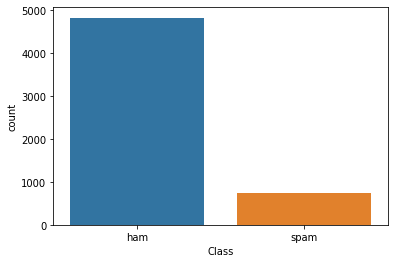

In [439]:
sns.countplot(data['Class'])

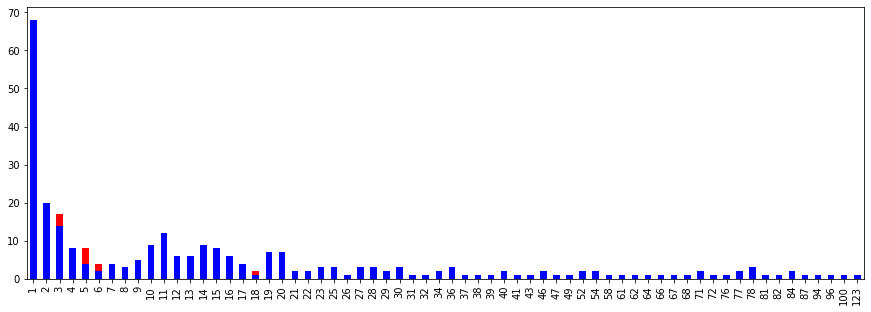

In [440]:
figure, axis = plt.subplots(figsize=(15,5))
spam_count['Count'].value_counts().sort_index().plot(ax=axis, kind='bar',facecolor='red');
ham_count['Count'].value_counts().sort_index().plot(ax=axis, kind='bar',facecolor='blue');

In [441]:
data['Class'] = data['Class'].map( {'spam': 1, 'ham': 0} )

In [442]:
data_ham  = data[data['Class'] == 0].copy()
data_spam = data[data['Class'] == 1].copy()

In [443]:
def show_wordcloud(df, title):
    text = ' '.join(df['Text'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='lightgrey',
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(10,7), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=20 )
    plt.show()


In [444]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [445]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [446]:
from sklearn.model_selection import train_test_split

In [447]:
x = data['Text'].values

In [448]:
y = data['Class'].values

In [449]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [450]:
t = Tokenizer()
t.fit_on_texts(x_train)

In [451]:
encoded_train = t.texts_to_sequences(X_train)

In [452]:
encoded_test = t.texts_to_sequences(X_test)

In [453]:
print(encoded_train[0:2])

[[38, 30, 8, 5, 273, 1989, 81, 116, 26, 11, 1656, 322, 10, 53, 18, 299, 30, 349, 1990], [799, 15, 2555, 1442, 1127, 192, 2556, 171, 12, 98, 1991, 44, 195, 1657, 2557, 1992, 2558, 21, 9, 4, 203, 1025, 225]]


**Padding**

In [454]:
max_length = 8

In [455]:
padded_train = pad_sequences(encoded_train, maxlen=max_length, padding='post')

In [456]:
padded_test = pad_sequences(encoded_test, maxlen=max_length, padding='post')

In [457]:
print(padded_train)

[[ 322   10   53 ...   30  349 1990]
 [1992 2558   21 ...  203 1025  225]
 [  83 1443    4 ...    2 3794 3795]
 ...
 [1477   30 2063 ...  239   30 2064]
 [ 763 1679 1161 ...    0    0    0]
 [   8  155   20 ...    8  290  175]]


In [458]:
vocab_size = len(t.word_index) + 1

**Create the model**

In [459]:
model = Sequential()

In [460]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Embedding
from keras.layers import Dense, Embedding, GRU, LSTM, Dropout, Bidirectional

**Add the input layer**

In [461]:
model.add(Embedding(vocab_size, 24, input_length=max_length))
model.add(Flatten())

**Add the hidden layers**

In [462]:
model.add(Dense(500, activation='relu'))
model.add(Dense(200, activation='relu'))

In [463]:
model.add(Dropout(0.5))

In [464]:
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

**Compile the model**

In [465]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

**Summarize the model**

In [466]:
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 8, 24)             190920    
                                                                 
 flatten_4 (Flatten)         (None, 192)               0         
                                                                 
 dense_20 (Dense)            (None, 500)               96500     
                                                                 
 dense_21 (Dense)            (None, 200)               100200    
                                                                 
 dropout_14 (Dropout)        (None, 200)               0         
                                                                 
 dense_22 (Dense)            (None, 100)               20100     
                                                                 
 dense_23 (Dense)            (None, 1)                

**Fit the model**

In [467]:
from tensorflow.keras.callbacks import EarlyStopping

In [468]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [469]:
model.fit(x=padded_train,y=y_train,epochs=50,validation_data=(padded_test, y_test), verbose=1,callbacks=[early_stop])

Epoch 1/50
140/140 [==============================] - 2s 9ms/step - loss: 0.1925 - accuracy: 0.9251 - val_loss: 0.0953 - val_accuracy: 0.9794
Epoch 2/50
140/140 [==============================] - 1s 8ms/step - loss: 0.0475 - accuracy: 0.9847 - val_loss: 0.0689 - val_accuracy: 0.9839
Epoch 3/50
140/140 [==============================] - 1s 8ms/step - loss: 0.0162 - accuracy: 0.9948 - val_loss: 0.1257 - val_accuracy: 0.9830
Epoch 4/50
140/140 [==============================] - 1s 8ms/step - loss: 0.0016 - accuracy: 0.9996 - val_loss: 0.1874 - val_accuracy: 0.9830
Epoch 5/50
140/140 [==============================] - 1s 7ms/step - loss: 2.0427e-06 - accuracy: 1.0000 - val_loss: 0.2515 - val_accuracy: 0.9803
Epoch 6/50
140/140 [==============================] - 1s 8ms/step - loss: 9.3135e-08 - accuracy: 1.0000 - val_loss: 0.2834 - val_accuracy: 0.9821
Epoch 7/50
140/140 [==============================] - 1s 8ms/step - loss: 5.6089e-09 - accuracy: 1.0000 - val_loss: 0.2780 - val_accuracy: 0

**Test the model**

In [470]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [471]:
def c_report(y_true, y_pred):
   print("Classification Report")
   print(classification_report(y_true, y_pred))
   acc_sc = accuracy_score(y_true, y_pred)
   print("Accuracy : "+ str(acc_sc))
   return

In [472]:
def plot_confusion_matrix(y_true, y_pred):
   mtx = confusion_matrix(y_true, y_pred)
   sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5, 
               cmap="Blues", cbar=False)
   plt.ylabel('True label')
   plt.xlabel('Predicted label')

In [473]:
preds = (model.predict(padded_test) > 0.5).astype("int32")

35/35 [==============================] - 0s 2ms/step


In [474]:
c_report(y_test, preds)

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       965
           1       0.96      0.90      0.93       150

    accuracy                           0.98      1115
   macro avg       0.97      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115

Accuracy : 0.9820627802690582


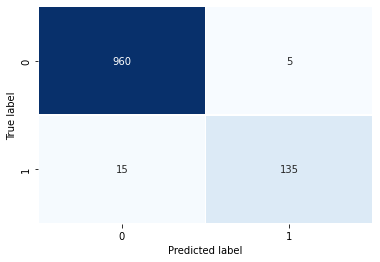

In [475]:
plot_confusion_matrix(y_test, preds)

**Save the model**

In [476]:
model.save("spam_model")
